In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from scipy.stats import t,ttest_1samp,ttest_ind
from scipy.stats import t , skewnorm , skew , norm , ttest_1samp , ttest_ind
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from numpy.random import seed
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# in the above two cells we've imported the data .
## from the data we can see that dataset consists of songs along with
## various attributes like duration,energy ,key, liveness etc.

In [4]:
corrmat

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [6]:
df[['genre','popularity']].groupby('genre').head()

,genre,popularity
0,Movie,0
1,Movie,1
2,Movie,3
3,Movie,0
4,Movie,4
135,R&B,65
136,R&B,63
137,R&B,62
138,R&B,61
139,R&B,68


In [7]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [8]:
print(df.columns)


Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [9]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [10]:
pd.isnull(df).sum()


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Popularity Distribution')

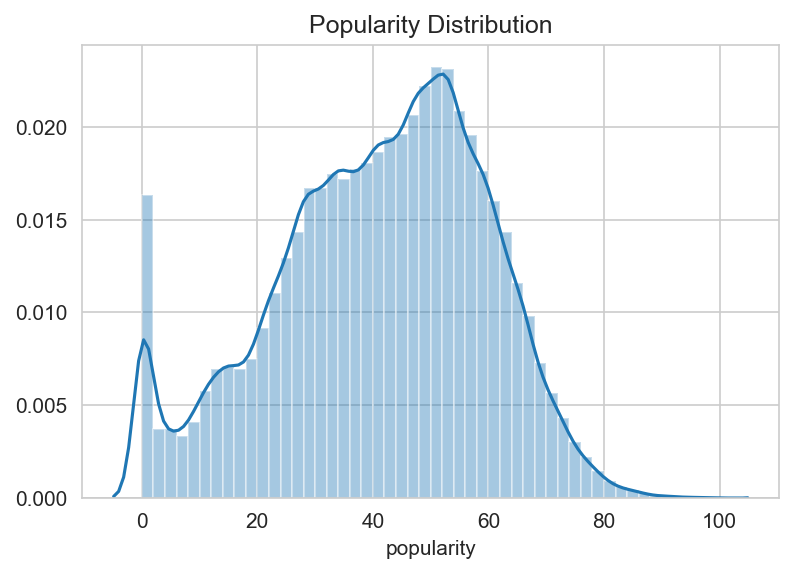

In [11]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Based on Time Signature')

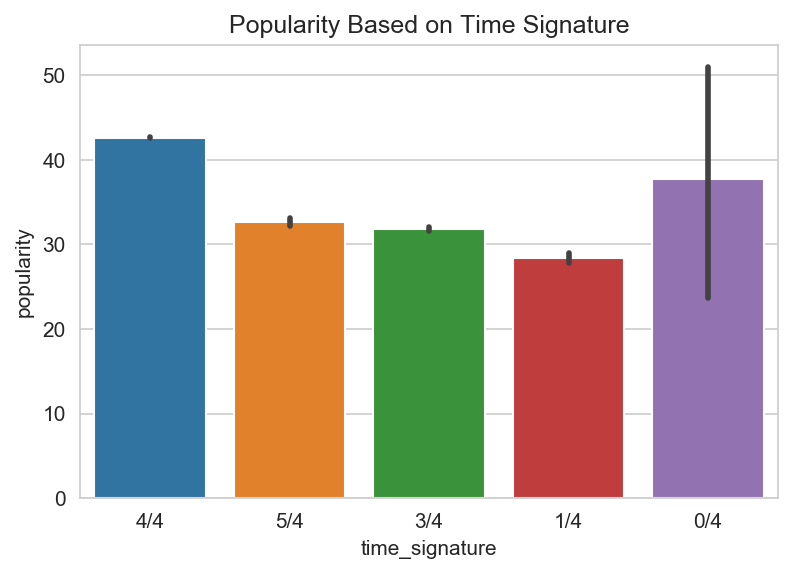

In [12]:
sns.barplot(x = 'time_signature', y = 'popularity', data = df)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

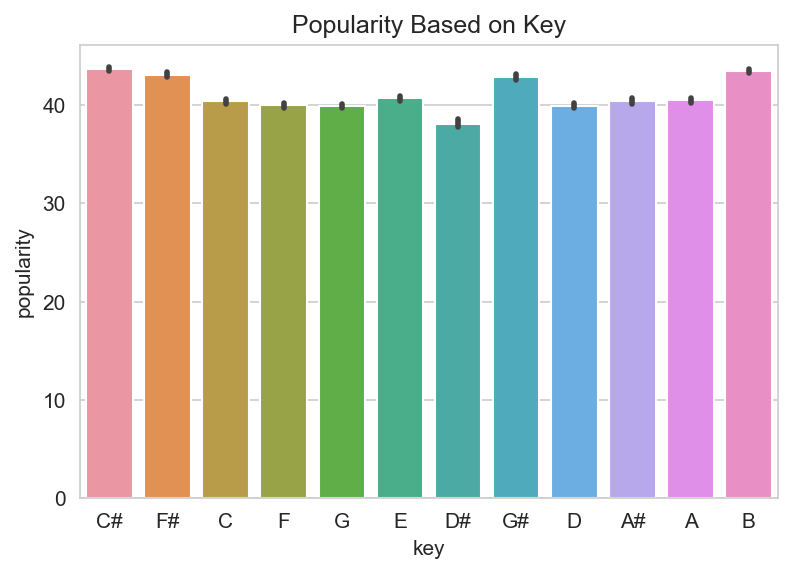

In [13]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Key')

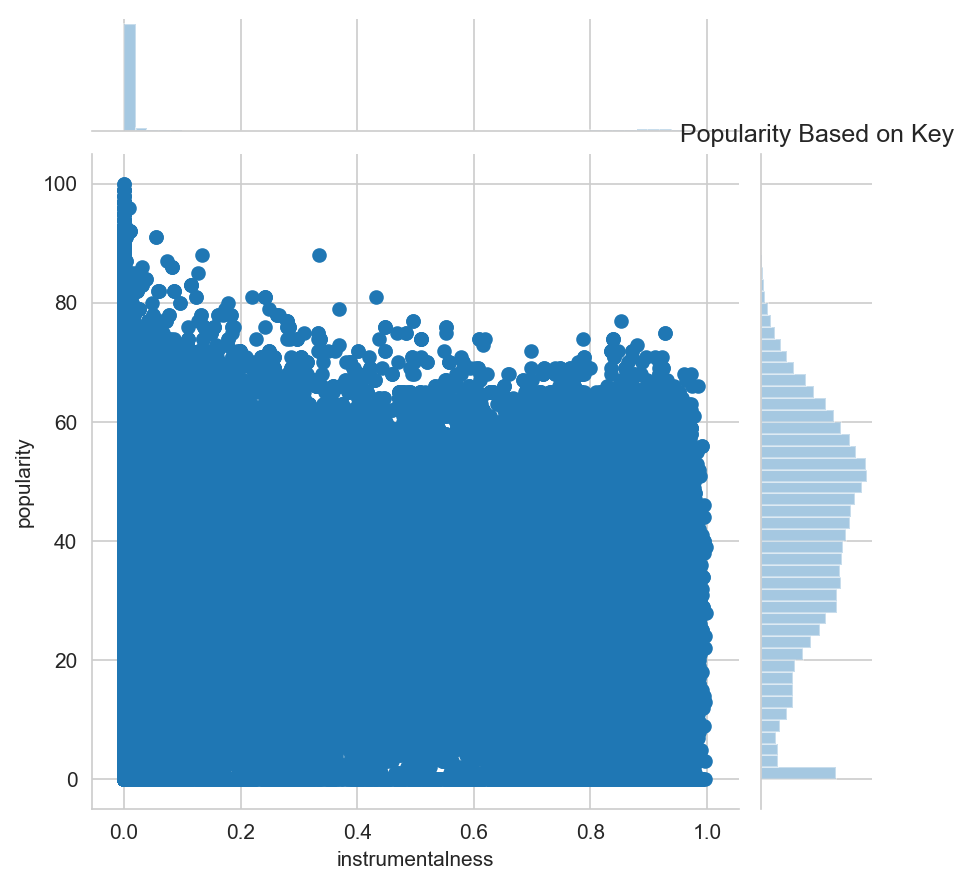

In [14]:
sns.jointplot(x = 'instrumentalness', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

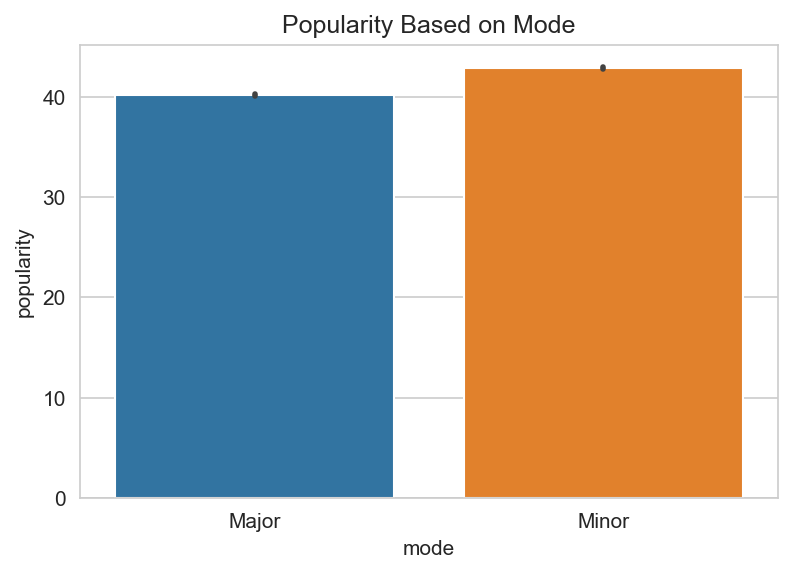

In [15]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

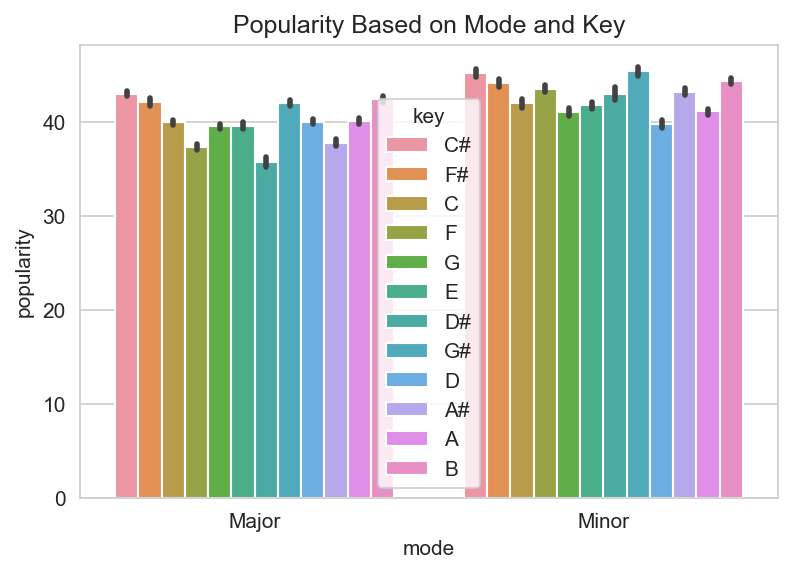

In [16]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = df)
plt.title('Popularity Based on Mode and Key')

In [17]:
# sns.barplot(x = 'loudness', y = 'popularity', data = df)
# plt.title('Popularity Based on Mode')

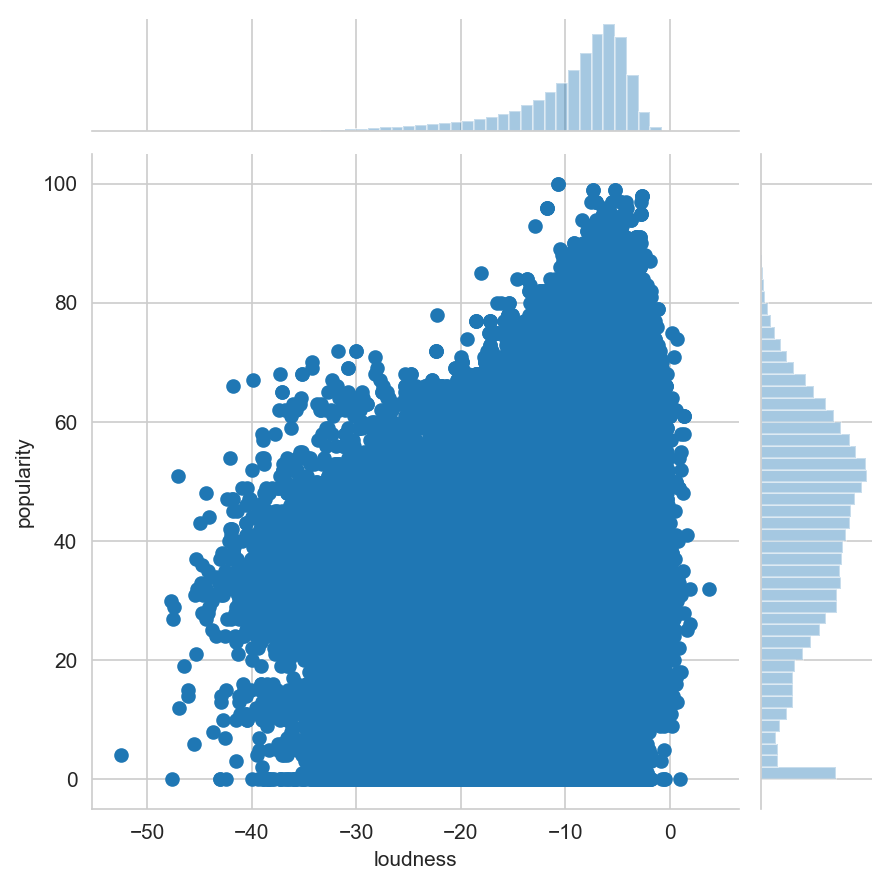

In [18]:
sns.jointplot(x = 'loudness', y = 'popularity', data = df)


Text(0.5, 1.0, 'Popularity Based on Mode and Key')

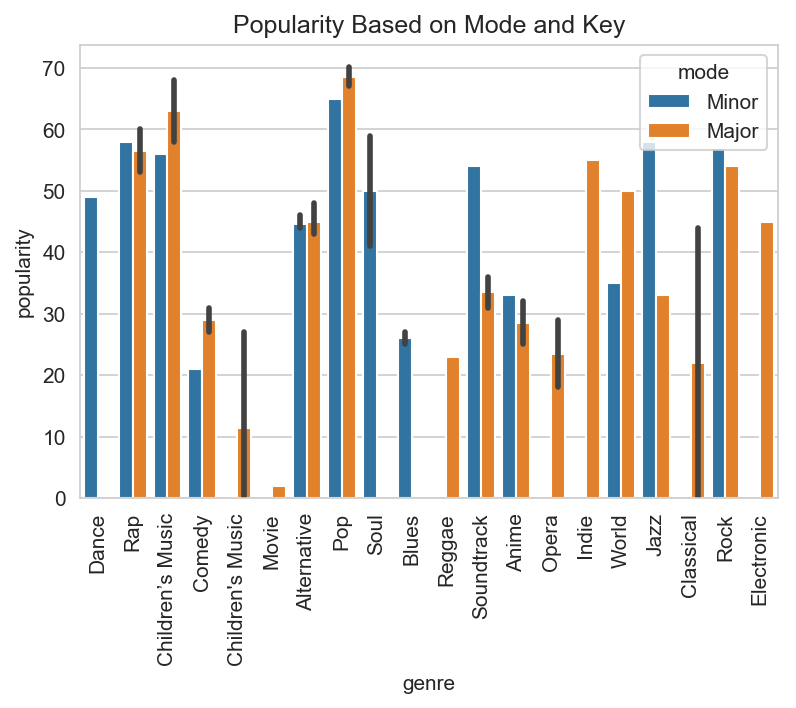

In [35]:
chart = sns.barplot(x = 'genre', y = 'popularity', hue = 'mode', data = df.sample(50))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.title('Popularity Based on Mode and Key')

### its interesting to see that people like more sad/emotional rap and rock sings and more upbeat or happy sounding pop songs .

[Text(0, 0, 'Movie'),
 Text(0, 0, 'R&B'),
 Text(0, 0, 'A Capella'),
 Text(0, 0, 'Alternative'),
 Text(0, 0, 'Country'),
 Text(0, 0, 'Dance'),
 Text(0, 0, 'Electronic'),
 Text(0, 0, 'Anime'),
 Text(0, 0, 'Folk'),
 Text(0, 0, 'Blues'),
 Text(0, 0, 'Opera'),
 Text(0, 0, 'Hip-Hop'),
 Text(0, 0, "Children's Music"),
 Text(0, 0, 'Children’s Music'),
 Text(0, 0, 'Rap'),
 Text(0, 0, 'Indie'),
 Text(0, 0, 'Classical'),
 Text(0, 0, 'Pop'),
 Text(0, 0, 'Reggae'),
 Text(0, 0, 'Reggaeton'),
 Text(0, 0, 'Jazz'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Ska'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Soul'),
 Text(0, 0, 'Soundtrack'),
 Text(0, 0, 'World')]

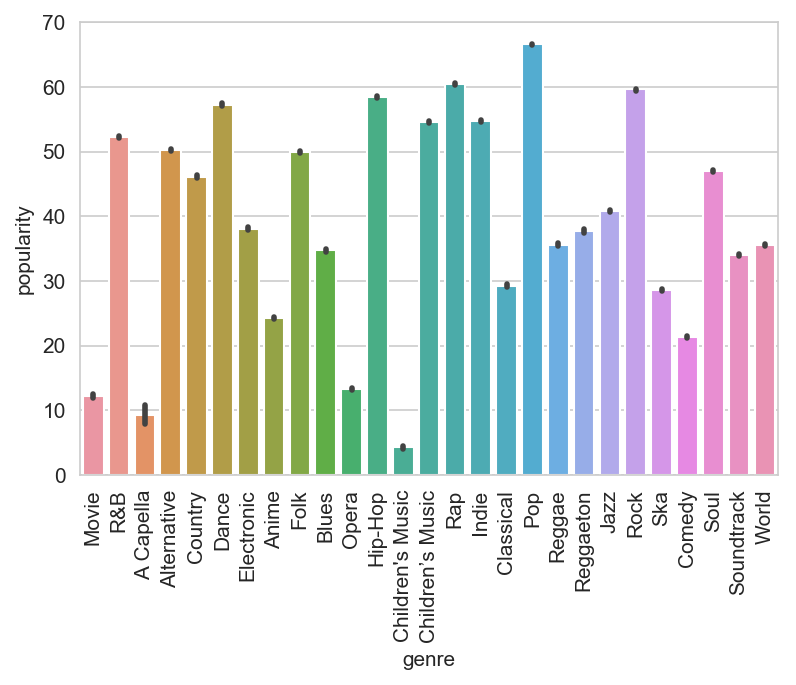

In [30]:
chart=sns.barplot(x = 'genre', y = 'popularity', data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


### we can clearly see that the pop music has the highest peak in popularity which is expected since the demand for pop music has just exploded in the recent past . Followed by pop we have hip-hop,rap and also rock music with similar popularities . Its interesting to see the relevance of rock music even today considering the fact it was introduced in 1960s.

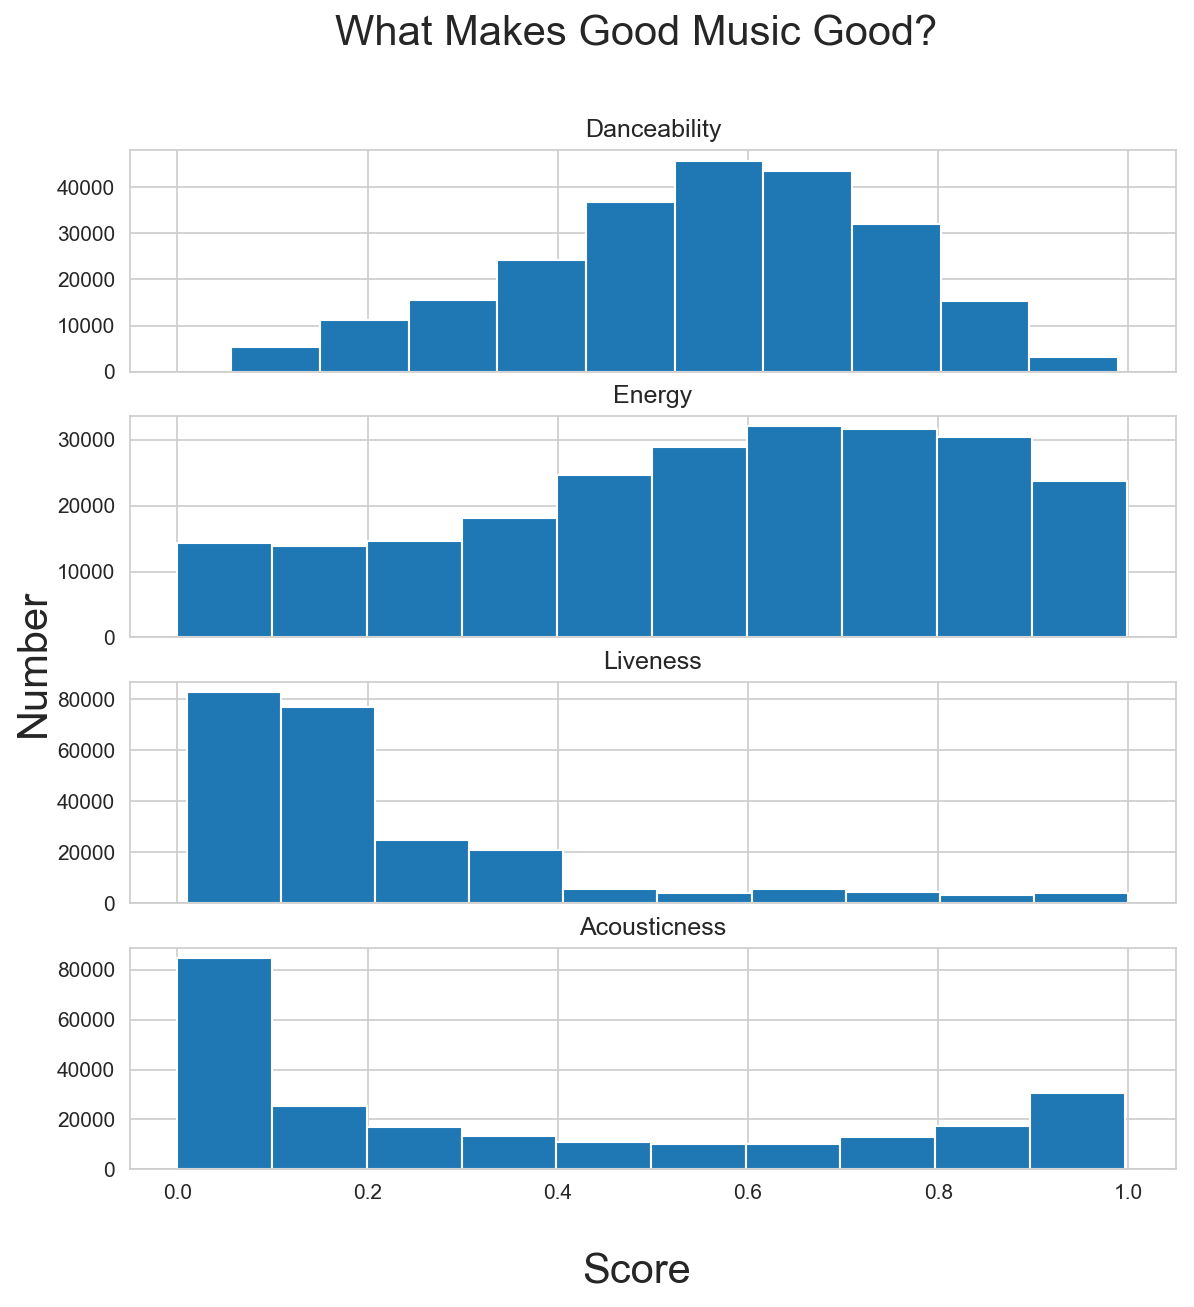

In [24]:
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Score', ha='center',size=20)
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical',size=20)
axs[0].hist(df['danceability'])
axs[0].set_title('Danceability')
axs[1].hist(df['energy'])
axs[1].set_title('Energy')
axs[2].hist(df['liveness'])
axs[2].set_title('Liveness')
axs[3].hist(df['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle('What Makes Good Music Good?',size=20)
plt.show()

### We have histograms of 4 attributes: Danceability, Energy, Liveness and Acousticness. It turns out people are looking for danceability and energy, and the less acoustics and live the song is, the more popular it might be.



### now let us examine the claim that people  high BPM music is more upbeat, but suprisingly there is no correlation between those two objects.



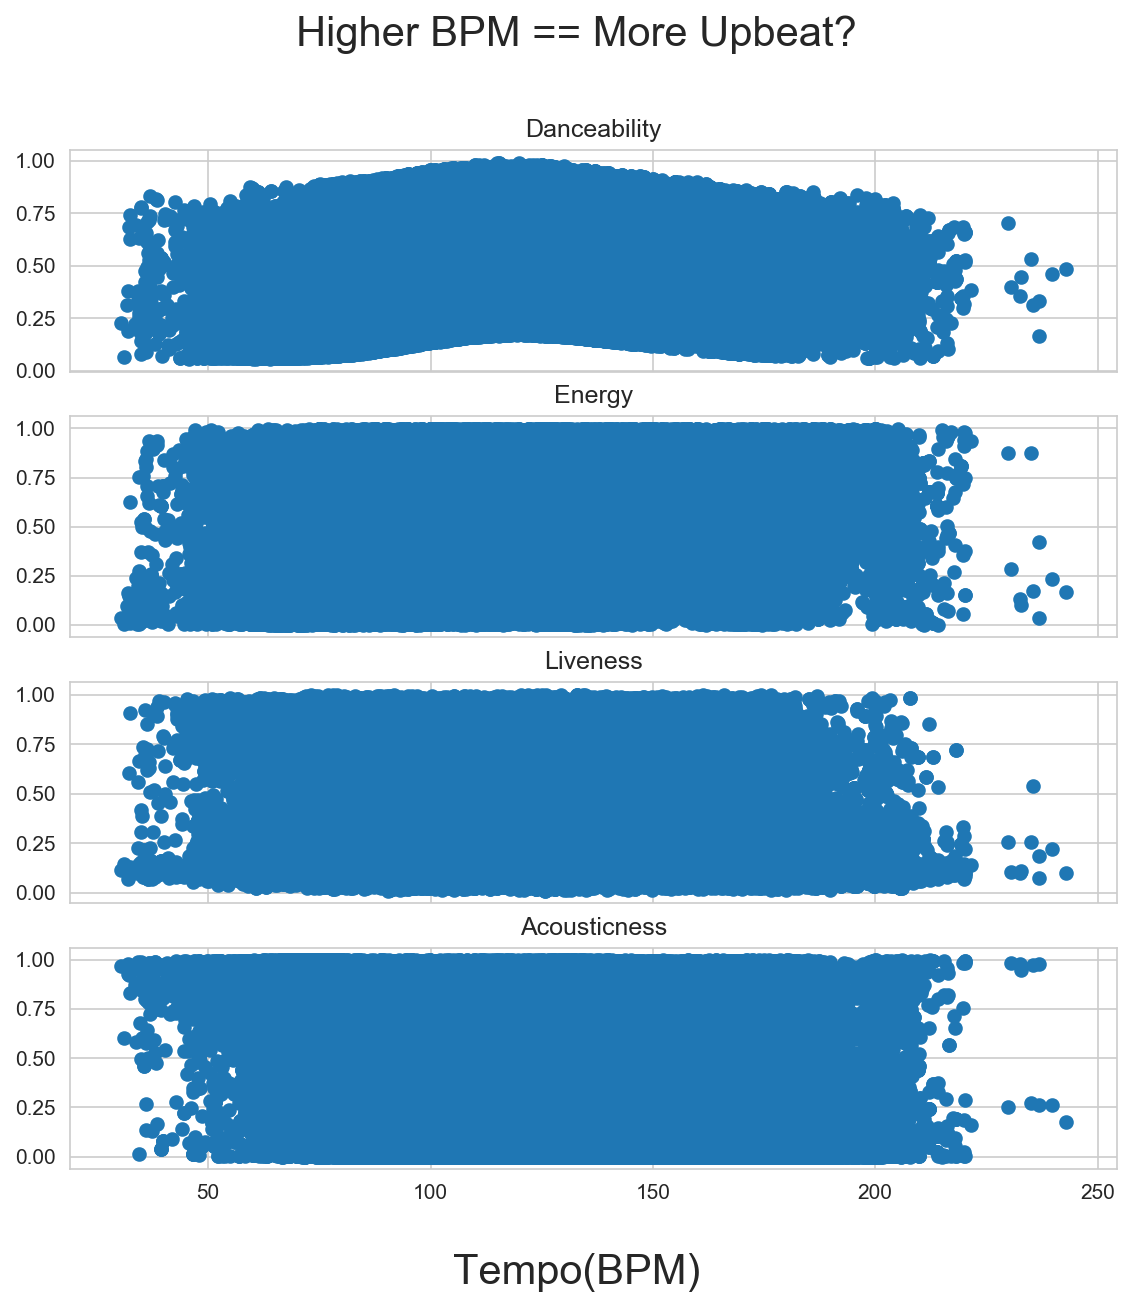

In [26]:
fig, axs = plt.subplots(4, 1, figsize=(9, 9), sharex=True)
fig.text(0.5, 0.04, 'Tempo(BPM)', ha='center',size=20)
axs[0].scatter(df['tempo'],df['danceability'])
axs[0].set_title('Danceability')
axs[1].scatter(df['tempo'],df['energy'])
axs[1].set_title('Energy')
axs[2].scatter(df['tempo'],df['liveness'])
axs[2].set_title('Liveness')
axs[3].scatter(df['tempo'],df['acousticness'])
axs[3].set_title('Acousticness')
fig.suptitle('Higher BPM == More Upbeat?',size=20)
plt.show()

### as we can see that there is no clear corelation between the song's tempo and it being more upbeat

### now let us examine the corelation between other independent variables

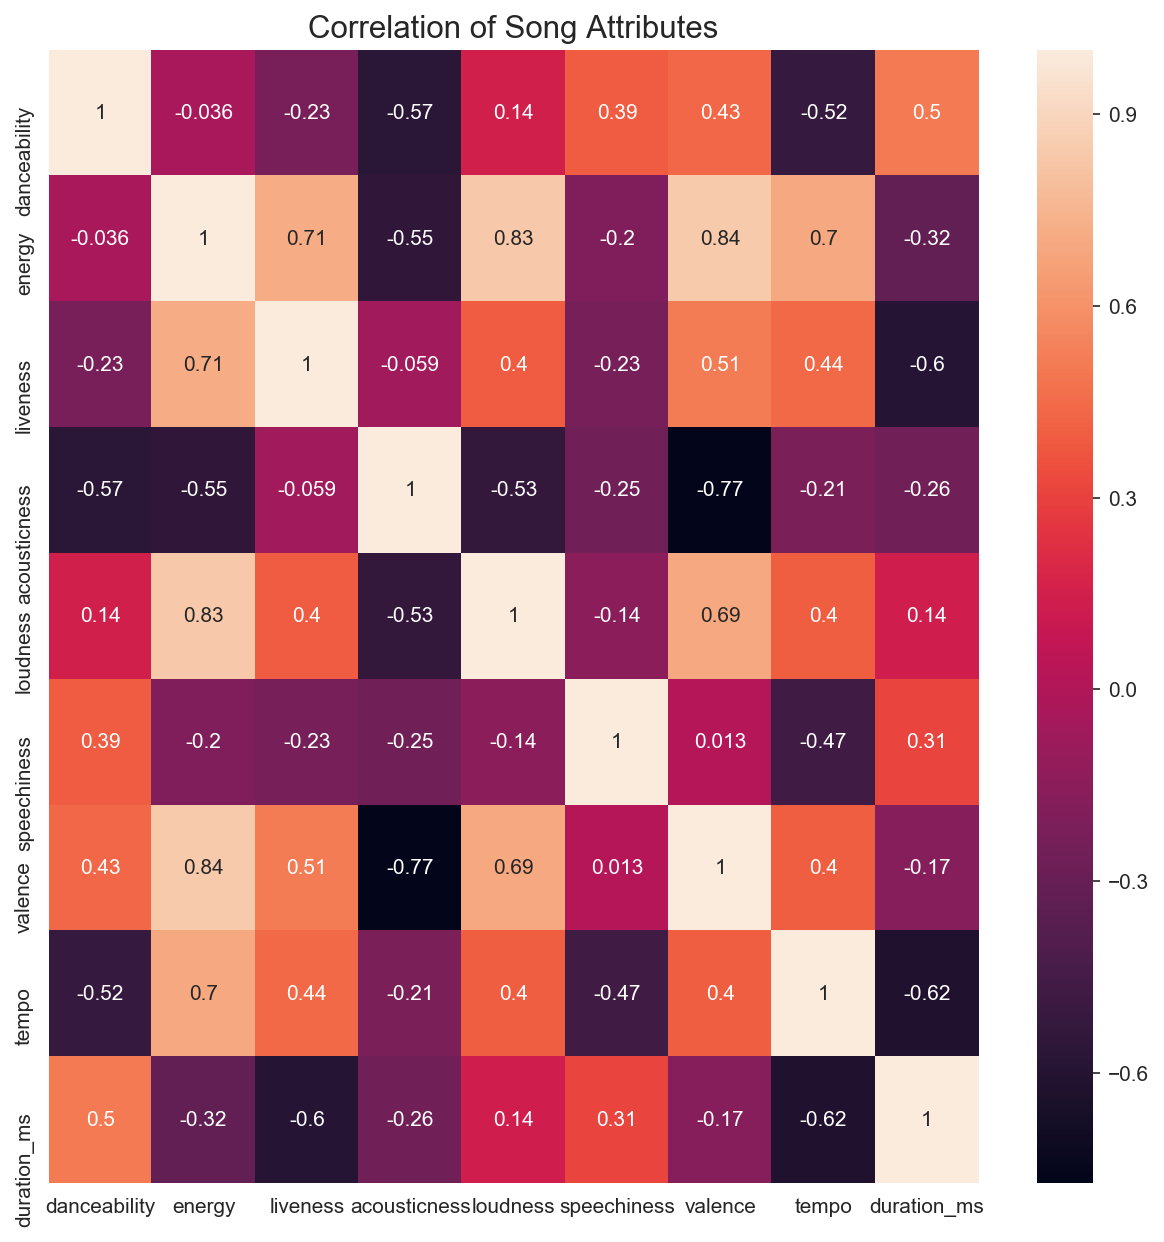

In [27]:
top10=df.iloc[0:10]
top10=top10[['danceability','energy','liveness',
             'acousticness','loudness','speechiness',
             'valence','tempo','duration_ms']]
corr=top10.corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.title("Correlation of Song Attributes",size=15)
plt.show("Correlation of Song Attributes")

### one striking thing is that the son's valence( A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track) is directing colrelated to the enrgy and loudness of the song .That means more positive sounding tracks are loud and are full of energy